In [23]:
%matplotlib inline
from matplotlib import ticker
from galsize_models.measurements import sdss_measurements
littleh=0.7

In [2]:
from scipy.stats import binned_statistic
def satellite_orphan_fraction(catalog, sm_bins=np.linspace(9, 11.75, 25)):
    fsat, __, __ = binned_statistic(catalog['sm'], catalog['upid']!=-1, 
                                    bins=sm_bins, statistic='mean')
    forph, __, __ = binned_statistic(catalog['sm'], catalog['orphan'], 
                                    bins=sm_bins, statistic='mean')

    return 0.5*(sm_bins[:-1] + sm_bins[1:]), fsat, forph

In [3]:
from galsize_models.models import load_orphan_subhalos, moustakas_sham
subhalos = load_orphan_subhalos()
print(subhalos.keys())

subhalos['sm'] = moustakas_sham(subhalos['mpeak'], 0.2)
# subhalos['sm'] = moustakas_sham(subhalos['mpeak'], 0.2)

# vmax_ratio_cut = 0.35
# orphan_mask = subhalos['frac_vpeak_remaining'] > vmax_ratio_cut
# mock = subhalos[orphan_mask]

['upid', 'mpeak', 'rvir', 'mvir', 'vx', 'vy', 'vz', 'uparent_dist', 'vmax', 'desc_id', 'halo_id', 'vmax_at_mpeak', 'y', 'x', 'z', 'dvmax_rank', 'orphan', 'last_snap', 'last_snap_halo_id', 'has_halotools_match', 'mpeak_scale', 'acc_scale', 'first_acc_scale', 'halfmass_scale', 'has_orphan_hlist_match', 'sm', 'vmax_at_mpeak_percentile', 'noisy_vmax_at_mpeak_percentile', 'orphan_mass_loss_percentile', 'orphan_vmax_at_mpeak_percentile', 'orphan_vmax_loss_percentile', 'orphan_fixed_mpeak_mhost_percentile', 'zpeak', 'rvir_zpeak', 'hostid', 'host_mvir', 'frac_mpeak_remaining', 'frac_vpeak_remaining']


In [4]:
def orphan_selection(catalog, mpeak_abscissa=(11.5, 13.5), 
                     prob_select_ordinates=(0.5, 0.1), 
                    selection_key='orphan_mass_loss_percentile'):
    num_subhalos = len(catalog)
    num_orphans = np.count_nonzero(catalog['orphan'])
    selection_indices = np.ones(num_subhalos).astype(bool)
    
    eligible_orphan_mask = catalog['orphan'] 
    orphans = catalog[eligible_orphan_mask]
    prob_select = np.interp(np.log10(orphans['mpeak']), 
                              mpeak_abscissa, prob_select_ordinates)
    selected_orphan_mask = orphans[selection_key] > 1-prob_select
    selection_indices[eligible_orphan_mask] = selected_orphan_mask
    return selection_indices

# mask = orphan_selection(subhalos)
# mock = subhalos[mask]
# mock_orphans = mock[mock['orphan']]
# all_orphans = subhalos[subhalos['orphan']]

# low, high = 11.5, 11.8
# mask = (all_orphans['mpeak'] > 10**low) & (all_orphans['mpeak'] < 10**high)
# full_sample = all_orphans[mask]
# mask2 = (mock_orphans['mpeak'] > 10**low) & (mock_orphans['mpeak'] < 10**high)
# selected_sample = mock_orphans[mask2]

# fig, ax = plt.subplots(1, 1)

# __=ax.hist(np.log10(full_sample['mvir']), bins=50, alpha=0.8, normed=True, color='gray')
# __=ax.hist(np.log10(selected_sample['mvir']), bins=50, alpha=0.8, normed=True, color='blue')

# frac_select = len(selected_sample)/float(len(full_sample))
# print("Fraction selected at this mass = {0:.3f}".format(frac_select))

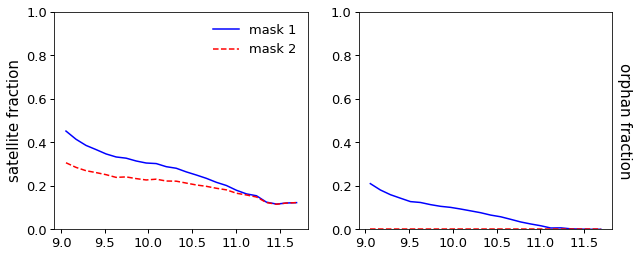

In [11]:
from galsize_models.measurements import masked_wp

orphan_mask1 = orphan_selection(subhalos, prob_select_ordinates=(0.5, 0.), 
                                mpeak_abscissa=(11, 13), 
                               selection_key='orphan_fixed_mpeak_mhost_percentile')
rmids, fsat1, forph1 = satellite_orphan_fraction(subhalos[orphan_mask1])

orphan_mask2 = orphan_selection(subhalos, prob_select_ordinates=(0., 0.), 
                                mpeak_abscissa=(11, 13), 
                               selection_key='orphan_fixed_mpeak_mhost_percentile')
rmids, fsat2, forph2 = satellite_orphan_fraction(subhalos[orphan_mask2])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
xlim1 = ax1.set_ylim(9, 12)
ylim1 = ax1.set_ylim(0, 1)
xlim2 = ax2.set_ylim(9, 12)
ylim2 = ax2.set_ylim(0, 1)

__=ax1.plot(rmids, fsat1, color='blue', label='mask 1')
__=ax1.plot(rmids, fsat2, '--', color='red', label='mask 2')
__=ax2.plot(rmids, forph1, color='blue', label='mask 1')
__=ax2.plot(rmids, forph2, '--',color='red', label='mask 2')
ylabel1 = ax1.set_ylabel('satellite fraction')
ax2.yaxis.set_label_position("right")
ylabel2 = ax2.set_ylabel('orphan fraction', rotation=-90, labelpad=20)

legend = ax1.legend()


In [12]:
np.all(orphan_mask1==orphan_mask2)

False

In [13]:
rmids, wp_mock1_sm9p75 = masked_wp(subhalos, (subhalos['sm'] > 9.75)*orphan_mask1)
rmids, wp_mock1_sm10p25 = masked_wp(subhalos, (subhalos['sm'] > 10.25)*orphan_mask1)
rmids, wp_mock1_sm10p75 = masked_wp(subhalos, (subhalos['sm'] > 10.75)*orphan_mask1)
rmids, wp_mock1_sm11p0 = masked_wp(subhalos, (subhalos['sm'] > 11.)*orphan_mask1)

In [14]:
rmids, wp_mock2_sm9p75 = masked_wp(subhalos, (subhalos['sm'] > 9.75)*orphan_mask2)
rmids, wp_mock2_sm10p25 = masked_wp(subhalos, (subhalos['sm'] > 10.25)*orphan_mask2)
rmids, wp_mock2_sm10p75 = masked_wp(subhalos, (subhalos['sm'] > 10.75)*orphan_mask2)
rmids, wp_mock2_sm11p0 = masked_wp(subhalos, (subhalos['sm'] > 11.)*orphan_mask2)

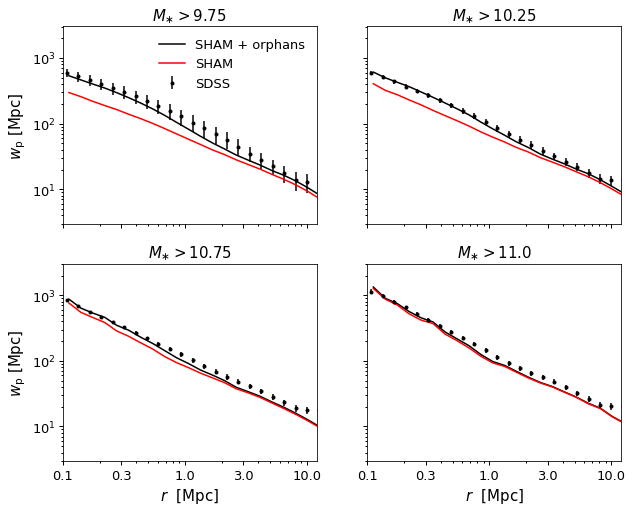

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
(ax1, ax2), (ax3, ax4) = axes

for ax in (ax1, ax2, ax3, ax4):
    __=ax.loglog()
    xlim = ax.set_xlim(0.1, 12)

xlabel3 = ax3.set_xlabel(r'$r$  $[{\rm Mpc}]$')
xlabel4 = ax4.set_xlabel(r'$r$  $[{\rm Mpc}]$')
ylabel1 = ax1.set_ylabel(r'$w_{\rm p}$ $[{\rm Mpc}]$')
ylabel3 = ax3.set_ylabel(r'$w_{\rm p}$ $[{\rm Mpc}]$')
    
title1 = ax1.set_title(r'$M_{\ast}>9.75$')
title2 = ax2.set_title(r'$M_{\ast}>10.25$')
title3 = ax3.set_title(r'$M_{\ast}>10.75$')
title4 = ax4.set_title(r'$M_{\ast}>11.0$')

x = sdss_measurements.rp*littleh

__=ax1.errorbar(x, 
               sdss_measurements.wp_sdss_mpajhu_sm9p75*littleh, 
               sdss_measurements.wperr_sdss_mpajhu_sm9p75*littleh, 
               fmt='.', color='k', label=r'SDSS')
__=ax2.errorbar(x, 
               sdss_measurements.wp_sdss_mpajhu_sm10p25*littleh, 
               sdss_measurements.wperr_sdss_mpajhu_sm10p25*littleh, 
               fmt='.', color='k', label=r'SDSS')
__=ax3.errorbar(x, 
               sdss_measurements.wp_sdss_mpajhu_sm10p75*littleh, 
               sdss_measurements.wperr_sdss_mpajhu_sm10p75*littleh, 
               fmt='.', color='k', label=r'SDSS')
__=ax4.errorbar(x, 
               sdss_measurements.wp_sdss_mpajhu_sm11p0*littleh, 
               sdss_measurements.wperr_sdss_mpajhu_sm11p0*littleh, 
               fmt='.', color='k', label=r'SDSS')

__=ax1.plot(rmids, wp_mock1_sm9p75, color='k', label=r'SHAM + orphans')
__=ax2.plot(rmids, wp_mock1_sm10p25, color='k', label=r'SHAM + orphans')
__=ax3.plot(rmids, wp_mock1_sm10p75, color='k', label=r'SHAM + orphans')
__=ax4.plot(rmids, wp_mock1_sm11p0, color='k', label=r'SHAM + orphans')
__=ax1.plot(rmids, wp_mock2_sm9p75, color='red', label=r'SHAM')
__=ax2.plot(rmids, wp_mock2_sm10p25, color='red', label=r'SHAM')
__=ax3.plot(rmids, wp_mock2_sm10p75, color='red', label=r'SHAM')
__=ax4.plot(rmids, wp_mock2_sm11p0, color='red', label=r'SHAM')


__=ax1.get_xaxis().set_major_formatter(ticker.NullFormatter())
__=ax1.get_xaxis().set_minor_formatter(ticker.NullFormatter())
__=ax2.get_xaxis().set_major_formatter(ticker.NullFormatter())
__=ax2.get_xaxis().set_minor_formatter(ticker.NullFormatter())

__=ax3.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax3.get_xaxis().set_minor_formatter(ticker.NullFormatter())
__=ax3.set_xticks((0.1, 0.3, 1, 3, 10))
__=ax4.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax4.get_xaxis().set_minor_formatter(ticker.NullFormatter())
__=ax4.set_xticks((0.1, 0.3, 1, 3, 10))

leg1 = ax1.legend()

figname = 'baseline_sham_orphans.pdf'
fig.savefig(figname, bbox_extra_artists=[xlabel3, ylabel3], bbox_inches='tight')


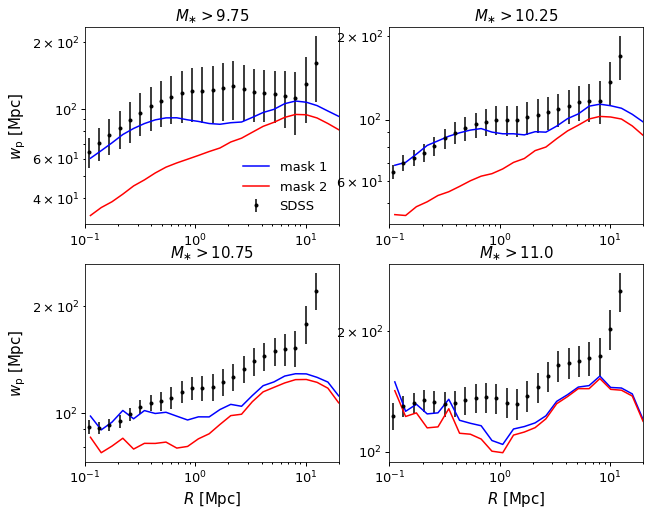

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
(ax1, ax2), (ax3, ax4) = axes

for ax in (ax1, ax2, ax3, ax4):
    __=ax.loglog()
    xlim = ax.set_xlim(0.1, 20)

xlabel3 = ax3.set_xlabel(r'$R$ $[{\rm Mpc}]$')
xlabel4 = ax4.set_xlabel(r'$R$ $[{\rm Mpc}]$')
ylabel1 = ax1.set_ylabel(r'$w_{\rm p}$ $[{\rm Mpc}]$')
ylabel3 = ax3.set_ylabel(r'$w_{\rm p}$ $[{\rm Mpc}]$')
    
title1 = ax1.set_title(r'$M_{\ast}>9.75$')
title2 = ax2.set_title(r'$M_{\ast}>10.25$')
title3 = ax3.set_title(r'$M_{\ast}>10.75$')
title4 = ax4.set_title(r'$M_{\ast}>11.0$')

x = sdss_measurements.rp*littleh
__=ax1.errorbar(x, 
               x*sdss_measurements.wp_sdss_mpajhu_sm9p75*littleh, 
               x*sdss_measurements.wperr_sdss_mpajhu_sm9p75*littleh, 
               fmt='.', color='k', label=r'SDSS')
__=ax2.errorbar(x, 
               x*sdss_measurements.wp_sdss_mpajhu_sm10p25*littleh, 
               x*sdss_measurements.wperr_sdss_mpajhu_sm10p25*littleh, 
               fmt='.', color='k', label=r'SDSS')
__=ax3.errorbar(x, 
               x*sdss_measurements.wp_sdss_mpajhu_sm10p75*littleh, 
               x*sdss_measurements.wperr_sdss_mpajhu_sm10p75*littleh, 
               fmt='.', color='k', label=r'SDSS')
__=ax4.errorbar(x, 
               x*sdss_measurements.wp_sdss_mpajhu_sm11p0*littleh, 
               x*sdss_measurements.wperr_sdss_mpajhu_sm11p0*littleh, 
               fmt='.', color='k', label=r'SDSS')

__=ax1.plot(rmids, rmids*wp_mock1_sm9p75, color='blue', label=r'mask 1')
__=ax2.plot(rmids, rmids*wp_mock1_sm10p25, color='blue', label=r'mask 1')
__=ax3.plot(rmids, rmids*wp_mock1_sm10p75, color='blue', label=r'mask 1')
__=ax4.plot(rmids, rmids*wp_mock1_sm11p0, color='blue', label=r'mask 1')
__=ax1.plot(rmids, rmids*wp_mock2_sm9p75, color='red', label=r'mask 2')
__=ax2.plot(rmids, rmids*wp_mock2_sm10p25, color='red', label=r'mask 2')
__=ax3.plot(rmids, rmids*wp_mock2_sm10p75, color='red', label=r'mask 2')
__=ax4.plot(rmids, rmids*wp_mock2_sm11p0, color='red', label=r'mask 2')

leg1 = ax1.legend()